In [115]:
import numpy as np
import pandas as pd

import re

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [25]:
def set_size(width='thesis', fraction=1, subplots=(1, 1)):
    """ Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 455.24411
    elif width == 'beamer':
        width_pt = 307.28987
    elif width == 'pnas':
        width_pt = 246.09686
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

# Using seaborn's style
plt.style.use('seaborn')

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.sans-serif": "Arial", # Google drawings font
        "font.family": "sans-serif",
#         "font.serif": "Computer Modern Roman",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 10,
        "font.size": 10,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
        "lines.linewidth": 0.7,
    
}

matplotlib.rcParams.update(nice_fonts)
sns.set(font_scale=1.5, rc=nice_fonts)
sns.set_style('whitegrid')


# Importing datasets

In [3]:
df_gcn = pd.read_csv('wandb_export_GCN_sweep.csv')
df_gat = pd.read_csv('wandb_export_GAT_sweep.csv')

In [4]:
df_gat

,Name,dropout,weight_decay,learning_rate,n_conv_layers,similarity,layer_sizes,_wandb,final_validation_r_fold_2,final_validation_mse_fold_1,...,validation_mse_fold_3,final_validation_mse_fold_2,final_validation_r_fold_3,train_r2_fold_1,final_validation_r_fold_1,validation_r2_fold_1,train_mse_fold_3,train_r_fold_2,validation_r2_fold_0,validation_mse_fold_0
0,summer-sweep-29-fold-4,0.003142,0.000605,0.013365,2,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[2048, 1024, 512, 256, 128, 1]",NaN,"[0.7258302086136431,0]",27.894621,...,46.040649,26.564274,"[0.7226826311447551,0]",0.906181,"[0.7151358222732984,0]",0.419463,17.632347,0.925308,0.394347,33.804966
1,different-sweep-7-fold-4,0.306806,0.002071,0.001679,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7156418650372596,0]",28.209438,...,43.203728,27.073273,"[0.711002296599681,0]",0.656101,"[0.707635441119485,0]",0.151917,17.190908,0.867931,0.191953,45.101715
2,bumbling-sweep-16-fold-4,0.104624,0.036676,0.003412,3,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7026725092682169,0]",28.189878,...,40.065670,27.997885,"[0.7060242905665377,0]",0.672837,"[0.7083545548468768,0]",0.320860,21.351851,0.631846,0.297744,39.196899
3,prime-sweep-6-fold-4,0.327091,0.001549,0.002482,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[512, 512, 512, 256, 128, 1]",NaN,"[0.707052692540311,0]",27.988211,...,45.506577,28.210487,"[0.7136404086576125,0]",0.635158,"[0.7104423977985255,0]",0.140557,19.590685,0.843027,0.172198,46.204323
4,fluent-sweep-26-fold-4,0.407471,0.006715,0.003246,3,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.6984818264686528,0]",29.519991,...,54.055073,28.346188,"[0.7082807553289461,0]",0.368334,"[0.692207055459365,0]",0.012113,28.716328,0.760176,0.081998,51.238895
5,blooming-sweep-24-fold-4,0.323481,0.002475,0.001462,3,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.688560591163895,0]",29.394712,...,43.903870,29.461382,"[0.7104433697945123,0]",0.683830,"[0.7026058182322128,0]",0.202336,17.737488,0.866825,0.201435,44.572445
6,copper-sweep-9-fold-4,0.291117,0.000844,0.006769,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7036632881174956,0]",29.888153,...,42.312069,28.186001,"[0.7003382520971198,0]",0.586584,"[0.6900236936358236,0]",-0.074891,15.491842,0.877735,0.207691,44.223293
7,stellar-sweep-27-fold-4,0.455777,0.001483,0.006813,3,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7054875408691097,0]",30.156441,...,53.730858,27.823391,"[0.7079052588148158,0]",0.424767,"[0.6824408168541461,0]",0.017297,31.105707,0.797036,-0.030941,57.542709
8,sunny-sweep-23-fold-4,0.381829,0.003226,0.003820,3,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[512, 512, 512, 256, 128, 1]",NaN,"[0.6974699199124839,0]",30.256987,...,52.105892,28.535599,"[0.7055612875345418,0]",0.502560,"[0.6974670986958343,0]",-0.063310,26.111219,0.816621,0.038749,53.652882
9,blooming-sweep-3-fold-4,0.467696,0.000705,0.002564,3,"(['SEX', 'ICD10', 'MEM', 'FTE'], 0.8)","[1024, 512, 512, 256, 256, 128, 128, 1]",NaN,"[0.6958516326955956,0]",28.729443,...,57.924721,28.868114,"[0.6993797693338168,0]",0.418167,"[0.6999175046820045,0]",-0.018657,32.773331,0.797660,-0.078212,60.181175


# GCN models

In [5]:
# Find the standard deviation over folds
df_gcn['cv_mse_mean'] = df_gcn['cv_validation_average_mse']
df_gcn['cv_mse_std'] = df_gcn[['final_validation_mse_fold_{}'.format(i) for i in range(5)]].std(axis=1)

In [6]:
df_gcn.loc[11, ['cv_mse_mean', 'cv_mse_std']]

cv_mse_mean     30.0235
cv_mse_std     0.767439
Name: 11, dtype: object

In [7]:
min_loss_idx = df_gcn['cv_mse_mean'].argmin()
min_loss_high_error = df_gcn.loc[min_loss_idx, 'cv_mse_mean'] + df_gcn.loc[min_loss_idx, 'cv_mse_std']

/Users/kamilestankeviciute/anaconda3/envs/datasci/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


In [8]:
df_gcn[df_gcn['cv_mse_mean'] <= min_loss_high_error][['Name', 'cv_mse_mean', 'cv_mse_std']]

,Name,cv_mse_mean,cv_mse_std
0,summer-sweep-50-fold-4,28.045074,0.594661
1,flowing-sweep-61-fold-4,28.372438,0.337489
2,electric-sweep-30-fold-4,28.523596,0.299467


In [9]:
df_gcn_filtered = df_gcn[df_gcn['cv_mse_mean'] - df_gcn['cv_mse_std'] <= min_loss_high_error].copy()
df_gcn_filtered['id'] = 'GCN' + (df_gcn_filtered.index + 1).astype(str)
df_gcn_filtered

,Name,learning_rate,similarity,layer_sizes,weight_decay,n_conv_layers,dropout,_wandb,validation_r2_fold_4,cv_validation_average_r,...,validation_mse_fold_0,final_validation_mse_fold_1,final_validation_r_fold_2,validation_r2_fold_2,final_validation_r_fold_3,final_validation_r2_fold_3,validation_mse_fold_3,cv_mse_mean,cv_mse_std,id
0,summer-sweep-50-fold-4,0.006984,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 512, 256, 256, 1]",0.013118,5,0.321941,NaN,0.173922,"[0.7098480072291622,0]",...,30.494959,27.811209,"[0.7138105142100741,0]",-0.278243,"[0.7012796633165099,0]",0.485083,59.785851,28.045074,0.594661,GCN1
1,flowing-sweep-61-fold-4,0.006187,"(['SEX', 'ICD10', 'MEM', 'FTE'], 0.8)","[1024, 512, 512, 512, 256, 256, 1]",0.002084,3,0.042080,NaN,0.469902,"[0.7042792789490768,0]",...,29.820312,28.273195,"[0.7061591373231205,0]",0.463630,"[0.6991002365059049,0]",0.484734,30.856045,28.372438,0.337489,GCN2
2,electric-sweep-30-fold-4,0.005095,"(['SEX', 'ICD10', 'MEM', 'FTE'], 0.8)","[1024, 512, 256, 128, 128, 1]",0.016171,1,0.048596,NaN,-0.190228,"[0.7007915945877421,0]",...,35.732410,28.188738,"[0.6932982696393085,0]",0.421974,"[0.6958425474989822,0]",0.483287,35.696411,28.523596,0.299467,GCN3
3,youthful-sweep-77-fold-4,0.004731,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[512, 512, 512, 256, 128, 1]",0.002517,2,0.237940,NaN,0.218647,"[0.7000994553788613,0]",...,43.174793,29.800779,"[0.7122666151406618,0]",0.189757,"[0.7020432043822225,0]",0.483986,41.209572,28.853450,1.017336,GCN4
4,scarlet-sweep-74-fold-4,0.015796,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[1024, 512, 256, 128, 128, 1]",0.003114,5,0.375442,NaN,0.436346,"[0.6989406541235141,0]",...,42.530941,29.236734,"[0.6994393921097604,0]",0.084196,"[0.7002392838990377,0]",0.486976,38.643169,28.875277,0.469869,GCN5
5,young-sweep-17-fold-4,0.010273,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[1024, 512, 256, 128, 128, 1]",0.005341,3,0.386998,NaN,0.140256,"[0.6958769303528729,0]",...,73.341690,29.762712,"[0.7063747770259314,0]",-0.011080,"[0.6951879801581095,0]",0.475877,58.371243,29.020517,0.806356,GCN6
8,dainty-sweep-46-fold-4,0.003504,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[2048, 1024, 512, 256, 128, 1]",0.018943,4,0.426491,NaN,0.033488,"[0.6895172047484973,0]",...,55.872749,30.430195,"[0.6894907591380667,0]",0.035095,"[0.6793212556379227,0]",0.455412,58.073753,29.491114,0.883251,GCN9


In [10]:
folds = ['final_validation_mse_fold_{}'.format(i) for i in range(5)]
df_gcn_filtered_melted = pd.melt(df_gcn_filtered, id_vars=['id'], value_vars=folds)

In [64]:
df_gcn_filtered_melted

,id,variable,value
0,GCN1,final_validation_mse_fold_0,28.409805
1,GCN2,final_validation_mse_fold_0,28.686419
2,GCN3,final_validation_mse_fold_0,28.211016
3,GCN4,final_validation_mse_fold_0,29.858328
4,GCN5,final_validation_mse_fold_0,29.505993
5,GCN6,final_validation_mse_fold_0,29.140207
6,GCN9,final_validation_mse_fold_0,29.495544
7,GCN1,final_validation_mse_fold_1,27.811209
8,GCN2,final_validation_mse_fold_1,28.273195
9,GCN3,final_validation_mse_fold_1,28.188738


In [11]:
df_gcn_filtered_melted_mt = df_gcn_filtered_melted.copy()
df_gcn_filtered_melted_mt['model_type'] = 'GCN'

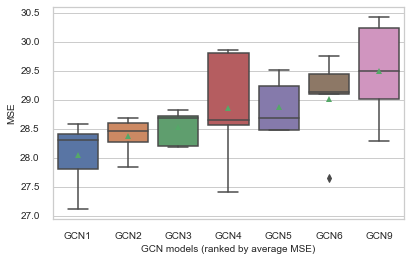

In [144]:
fig, ax = plt.subplots(figsize=set_size())
ax = sns.boxplot(x="id", y="value", data=df_gcn_filtered_melted, ax=ax, showmeans=True)
ax.set_xlabel('GCN models (ranked by average MSE)')
ax.set_ylabel('MSE')
plt.savefig('figs/gcn_model_selection.pdf', bbox_inches='tight', pad_inches=0.1) 

# GAT models

In [12]:
# Find the standard deviation over folds
df_gat['cv_mse_mean'] = df_gat['cv_validation_average_mse']
df_gat['cv_mse_std'] = df_gat[['final_validation_mse_fold_{}'.format(i) for i in range(5)]].std(axis=1)

In [13]:
gat_min_loss_idx = df_gat['cv_mse_mean'].idxmin()
gat_min_loss_high_error = df_gat.loc[gat_min_loss_idx, 'cv_mse_mean'] + df_gat.loc[gat_min_loss_idx, 'cv_mse_std']

In [14]:
df_gat[df_gat['cv_mse_mean'] - df_gat['cv_mse_std'] <= gat_min_loss_high_error][['Name', 'cv_mse_mean', 'cv_mse_std']]

,Name,cv_mse_mean,cv_mse_std
0,summer-sweep-29-fold-4,27.543018,0.757831
1,different-sweep-7-fold-4,28.107559,0.787149
2,bumbling-sweep-16-fold-4,28.207404,0.182981
3,prime-sweep-6-fold-4,28.425118,0.458002
4,fluent-sweep-26-fold-4,28.561369,0.760319
5,blooming-sweep-24-fold-4,28.822765,0.694876
6,copper-sweep-9-fold-4,28.848512,0.900478
7,stellar-sweep-27-fold-4,28.859661,0.941607
8,sunny-sweep-23-fold-4,28.981194,0.739823


In [15]:
df_gat_filtered = df_gat[df_gat['cv_mse_mean'] - df_gat['cv_mse_std'] <= gat_min_loss_high_error].copy()
df_gat_filtered['id'] = 'GAT' + (df_gat_filtered.index + 1).astype('str')
df_gat_filtered

,Name,dropout,weight_decay,learning_rate,n_conv_layers,similarity,layer_sizes,_wandb,final_validation_r_fold_2,final_validation_mse_fold_1,...,train_r2_fold_1,final_validation_r_fold_1,validation_r2_fold_1,train_mse_fold_3,train_r_fold_2,validation_r2_fold_0,validation_mse_fold_0,cv_mse_mean,cv_mse_std,id
0,summer-sweep-29-fold-4,0.003142,0.000605,0.013365,2,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[2048, 1024, 512, 256, 128, 1]",NaN,"[0.7258302086136431,0]",27.894621,...,0.906181,"[0.7151358222732984,0]",0.419463,17.632347,0.925308,0.394347,33.804966,27.543018,0.757831,GAT1
1,different-sweep-7-fold-4,0.306806,0.002071,0.001679,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7156418650372596,0]",28.209438,...,0.656101,"[0.707635441119485,0]",0.151917,17.190908,0.867931,0.191953,45.101715,28.107559,0.787149,GAT2
2,bumbling-sweep-16-fold-4,0.104624,0.036676,0.003412,3,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7026725092682169,0]",28.189878,...,0.672837,"[0.7083545548468768,0]",0.320860,21.351851,0.631846,0.297744,39.196899,28.207404,0.182981,GAT3
3,prime-sweep-6-fold-4,0.327091,0.001549,0.002482,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[512, 512, 512, 256, 128, 1]",NaN,"[0.707052692540311,0]",27.988211,...,0.635158,"[0.7104423977985255,0]",0.140557,19.590685,0.843027,0.172198,46.204323,28.425118,0.458002,GAT4
4,fluent-sweep-26-fold-4,0.407471,0.006715,0.003246,3,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.6984818264686528,0]",29.519991,...,0.368334,"[0.692207055459365,0]",0.012113,28.716328,0.760176,0.081998,51.238895,28.561369,0.760319,GAT5
5,blooming-sweep-24-fold-4,0.323481,0.002475,0.001462,3,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.688560591163895,0]",29.394712,...,0.683830,"[0.7026058182322128,0]",0.202336,17.737488,0.866825,0.201435,44.572445,28.822765,0.694876,GAT6
6,copper-sweep-9-fold-4,0.291117,0.000844,0.006769,2,"(['SEX', 'ICD10', 'FI', 'FTE', 'MEM'], 0.9)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7036632881174956,0]",29.888153,...,0.586584,"[0.6900236936358236,0]",-0.074891,15.491842,0.877735,0.207691,44.223293,28.848512,0.900478,GAT7
7,stellar-sweep-27-fold-4,0.455777,0.001483,0.006813,3,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[1024, 512, 256, 128, 128, 1]",NaN,"[0.7054875408691097,0]",30.156441,...,0.424767,"[0.6824408168541461,0]",0.017297,31.105707,0.797036,-0.030941,57.542709,28.859661,0.941607,GAT8
8,sunny-sweep-23-fold-4,0.381829,0.003226,0.003820,3,"(['SEX', 'ICD10', 'MEM', 'FI'], 0.8)","[512, 512, 512, 256, 128, 1]",NaN,"[0.6974699199124839,0]",30.256987,...,0.502560,"[0.6974670986958343,0]",-0.063310,26.111219,0.816621,0.038749,53.652882,28.981194,0.739823,GAT9


In [16]:
folds = ['final_validation_mse_fold_{}'.format(i) for i in range(5)]
df_gat_filtered_melted = pd.melt(df_gat_filtered, id_vars=['id'], value_vars=folds)

In [17]:
df_gat_filtered_melted_mt = df_gat_filtered_melted.copy()
df_gat_filtered_melted_mt['model_type'] = 'GAT'

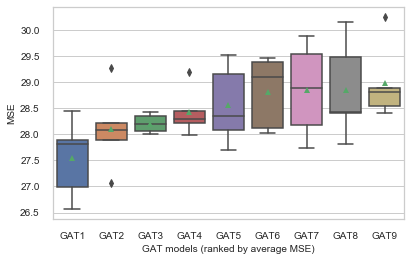

In [145]:
fig, ax = plt.subplots(figsize=set_size())
ax = sns.boxplot(x="id", y="value", data=df_gat_filtered_melted, ax=ax, showmeans=True)
ax.set_xlabel('GAT models (ranked by average MSE)')
ax.set_ylabel('MSE')
plt.savefig('figs/gat_model_selection.pdf', bbox_inches='tight', pad_inches=0.1) 

In [18]:
df_gcn_gat_melted = pd.concat([df_gcn_filtered_melted_mt, df_gat_filtered_melted_mt])

In [19]:
df_gcn_gat_melted

,id,variable,value,model_type
0,GCN1,final_validation_mse_fold_0,28.409805,GCN
1,GCN2,final_validation_mse_fold_0,28.686419,GCN
2,GCN3,final_validation_mse_fold_0,28.211016,GCN
3,GCN4,final_validation_mse_fold_0,29.858328,GCN
4,GCN5,final_validation_mse_fold_0,29.505993,GCN
...,...,...,...,...
40,GAT5,final_validation_mse_fold_4,28.084633,GAT
41,GAT6,final_validation_mse_fold_4,28.117928,GAT
42,GAT7,final_validation_mse_fold_4,27.735584,GAT
43,GAT8,final_validation_mse_fold_4,28.421469,GAT


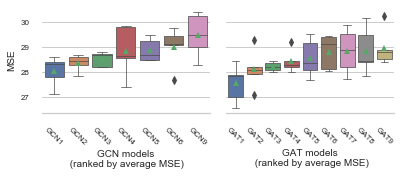

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=set_size(subplots=(1, 2)), sharey=True)
plt.subplots_adjust(wspace=0.1)
ax1 = sns.boxplot(x="id", y="value", data=df_gcn_filtered_melted, ax=ax1, showmeans=True)
ax2 = sns.boxplot(x="id", y="value", data=df_gat_filtered_melted, ax=ax2, showmeans=True)
ax1.set_xlabel('GCN models\n (ranked by average MSE)')
ax2.set_xlabel('GAT models\n (ranked by average MSE)')
ax1.set_ylabel('MSE')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-45, horizontalalignment='center')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=-45, horizontalalignment='center')
y_axis = ax2.axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)
sns.despine(left=True)
plt.savefig('figs/model_selection.pdf',  bbox_inches='tight', pad_inches=0.1)

# Test set performance

In [23]:
gat_r = [0.6978445057645353, 0.6906473243299881, 0.696183084238787, 0.7058810629977372, 0.691971631644815]
gat_r2 = [0.4793288177573576, 0.4652271047976857, 0.47466520064342155, 0.49091856115693666, 0.47559316011126296]

gcn_r = [0.6807833725370191, 0.6836219922013989, 0.6699227749777252, 0.6627289172697364, 0.6798567782049989]
gcn_r2 = [0.4451404895964184, 0.45235574208266993, 0.4463978935067895, 0.42749926873355737, 0.4547305379325923]

In [24]:
print(np.mean(gat_r), np.std(gat_r))
print(np.mean(gat_r2), np.std(gat_r2))

print(np.mean(gcn_r), np.std(gcn_r))
print(np.mean(gcn_r2), np.std(gcn_r2))

0.6965055217951726 0.005379075279740353
0.4771465688933329 0.008307513136632428
0.6753827670381757 0.007835809775992532
0.44522478637040547 0.00955810759435201


# Plotting timeseries

In [39]:
example_ts1 = np.array([7078.7,7140.7,7082.8,7113.1,7076.9,7111.1,7111.3,7075.5,7087.9,7055.2,7070.4,7003.3,7012.8,7077.2,7064.8,7026.7,7063.9,7057.1,7129.2,7072,7105,7123.1,7141.7,7054.4,7089.1,7054.8,7045.8,7022.3,7020.3,7059.6,7098.1,7043.3,7133.8,7073.1,7074.5,7093.8,7100.2,7108.7,7118.9,7133.1,7088.1,7146.5,7089.6,7151.3,7152.1,7123.2,7113.9,7084.2,7083.1,7108.3,7130,7144.1,7127.5,7065.4,7132.3,7084.5,7062,7083.3,7097.2,7080.7,7064.3,7028.4,7126.5,7142.5,7120,7018.5,7102.8,7186.6,7097,7103.4,7100.1,7090.1,7060.9,7075.6,7064.4,7075.9,7056.3,7094.1,7064.4,7103.3,7044.4,7127.2,7072.3,7092.9,7105.7,7156.6,7054.4,7098.5,7090.1,7096.8,7074.5,7120.4,7116.5,7020.3,7100.1,7120.8,7130.3,7094.3,7069.8,7095.4,7070.9,7084.2,7087.7,7101.9,7004.3,7044.3,7083.7,7050.7,7103.1,7080.1,7058.5,7052.1,7033.3,7073.9,7038.2,7043.3,7061.2,7083.8,7084.8,7109,7057.9,7095,7043.9,7119.8,7024.4,7097.5,7072,7050.1,7054.1,7111.5,7034.4,7090.4,7074.9,7070.6,7077.1,7066.6,7076.8,7084.9,7099.6,7099.8,7061.5,7070.9,7059.6,7109.7,7084.4,7160.1,7061.7,7085.2,7092.5,7054.9,7033.3,7070.4,7053.6,7093.1,7061.4,7096.5,7105.8,7021,7125.2,7122.3,7105.3,7131.8,7029.7,7077.1,7025.1,7108.8,7074.4,7072.8,7123.2,7109.2,7097.5,7109.7,7124.2,7049.8,7051.2,7021.2,7075.7,7080.7,7068.6,7077.2,7059,7069.5,7082.8,7122.5,7148.5,7112.2,7075.2,7094,7123.8,7160.7,7127.7,7031.1,7053.2,7098,7022.9,7086.6,7100.6,7166,7109.8,7099.3,7111.5,7111.2,7101.1,7073.1,7043.7,7056.2,7077.5,7097.3,7077.2,7096.8,7126.8,7120.1,7036.3,7128.7,7058.1,7047.8,7055.9,7090.7,7062.3,7070.4,7019.9,7083.2,7072.4,7048.4,7087.2,7079.7,7035.8,7082.9,7109,7113.1,7122.7,7077.8,7143.2,7142.7,7100.7,7015.8,7049.8,7132.2,7064.3,7101.4,7087.5,7042.8,7054.8,7071.4,7063.5,7113.9,7109.5,7081.6,7074.7,7103.6,7091.6,7124.6,7103.5,7099.7,7102.3,7076.9,7099.4,7128.1,7100.3,7112.1,7104.4,7094.8,7053.4,7078.4,7028.1,7026.6,7054.6,7059.1,7106.1,7142.6,7056.6,7103.5,7131,7079.6,7066.9,7112.1,7085.6,7042.4,7058.9,7081.8,7040.9,7020.5,7109.8,7078.5,7133.6,7057.1,7088.9,7124.6,7072.5,7124.7,7038.1,7085.2,7050.8,7051.1,7080.9,7057,7094,7024.2,7091.2,7082.4,7077.3,7074.6,7043.9,7125.9,7038.7,7083.2,7075.5,6992.1,7024.2,7087.6,7078.1,7105.7,7111.1,7061.6,7046.8,7061.7,7032.8,7021.8,7053.7,7049.2,7071.5,7144.9,7069.6,7034.1,7098,7129.3,7079,7113.5,7053.5,7037.7,7097.7,7088.1,7133,7068.8,7076.6,7078.3,7013.1,7076.8,7060.5,7099,7049.5,7083.4,7048.4,7100.3,7071.4,7027,7072.1,6992.6,7039.7,7075.2,7082.2,7084.3,7067.2,7058.3,7067.1,7067,7138.3,7132.4,7108.9,7093.7,7090.6,7090,7038.6,7050,7037.1,7047.7,7082.3,7036.4,7100.1,7063.8,7088.1,7063.4,7054.9,7051.4,7127.9,7095.8,7077.4,7046.8,7051.7,7028.8,7131.7,7091.8,7133.8,7021.3,7085.4,7118.9,7154.1,7134.7,7098.2,7042.9,7058,7092.1,7043.7,7065.2,7034.1,7078.5,7093.9,7082.7,7101.2,7108.3,7076.2,7121.7,7102.1,7097.7,7085.5,7052.9,7079.4,7056.7,7037.3,7087.6,7126.4,7088.2,7082.2,7152.9,7088.7,7089,7103.2,7156.8,7130.8,7089.6,7161.8,7101.5,7140.1,7083.3,7131.6,7053.7,7061.1,7156.5,7152.3,7171.5,7090.1,7101.3,7081.7,7128.6,7119.7,7115.7,7084.5,7149.9,7120.8,7126.7,7121.4,7124.2,7044.4,7081.7,7084,7056.7,7051.2,7080.5,7055.4,7067.6,7068.3,7112,7089.1,7078.2,7120.2,7104.2,7076.8,7050.4,7087.5,7162.2,7061.3,7083.5,7080.1,7064.1,7099.4,7086,7070.8,7085.8,7074.8,7095.1,7091.2,7090.5,7109.2,7078.2,7044.2,6987.9,7024.5,7007.9,7041.5,7065.2,7048,7111.7,7118.8,7119,7074.1,7097.3,7037.9,7120.8,7073.4,7109.5])
example_ts2 = np.array([9878,9852.5,9724.3,9780.8,9797.3,9780.2,9772.8,9823.6,9758.6,9768.5,9804.9,9838.2,9843.3,9834.2,9794,9792.3,9829.1,9853.6,9842,9855,9746.8,9782.2,9789.5,9779.1,9708.7,9810.6,9751.6,9849.3,9835.9,9888.6,9927.4,9860.9,9876.7,9876.5,9871.9,9868.2,9898.7,9871.7,9878.9,9841.2,9815.2,9831.6,9812.5,9770.4,9718.4,9776.9,9760,9798.8,9781.5,9817.5,9801.7,9775.2,9818.4,9836.9,9752,9767,9792.3,9798.6,9825.8,9845.5,9810.3,9842.5,9822.7,9806.1,9748.8,9805.5,9853.2,9841.2,9770.2,9810.9,9761.6,9749.4,9766.8,9726.4,9790.6,9760.1,9833.7,9834.3,9855.9,9847.5,9888.3,9842.2,9835.6,9811.9,9820.6,9783.5,9786.7,9844.6,9891.4,9873.7,9952.9,9892.7,9861,9786.1,9881.5,9870.1,9877.7,9858,9749.5,9823.1,9799.3,9819.1,9769.6,9819.9,9773.5,9763.2,9802.8,9836.7,9801.4,9797.7,9799.9,9776.7,9854.7,9782.8,9807,9776,9790.1,9787,9811.7,9808.8,9801.9,9763.3,9742.4,9846.6,9794.7,9829.3,9832,9763.6,9753.9,9777.8,9815.7,9857.8,9863.5,9839.6,9856,9823.8,9839.5,9904.9,9748.7,9767.6,9775.3,9761.3,9796.4,9811.3,9863.2,9830.4,9829.3,9795.3,9799.5,9784.6,9685.9,9810.5,9795.6,9840.1,9813.1,9774.1,9837.1,9759.2,9799,9776.9,9780.8,9800,9784.2,9818.5,9801.5,9881.6,9878.9,9854.5,9875.8,9871.4,9834.4,9780.4,9834.8,9796.5,9761,9799.1,9795.6,9828.7,9805.2,9832.1,9819.2,9782.7,9788.9,9842.8,9778.8,9784.9,9777.6,9858.2,9911.7,9774.4,9920.1,9765.8,9868.1,9872,9863.5,9858.3,9913.4,9840.1,9861.3,9846.2,9882.3,9850.1,9857.8,9806.4,9754.5,9760.8,9791.3,9870.4,9786.1,9871.4,9806.6,9760.5,9808.9,9831.4,9833.9,9753.3,9787.8,9785.9,9770.5,9831.2,9815.2,9852.2,9824.9,9777.2,9870.4,9918.1,9883.6,9872.8,9887.7,9854.6,9827.2,9850.9,9838.2,9878.4,9739.2,9840.4,9816.7,9804.6,9846.9,9776,9843,9858.6,9820.6,9786.3,9810.1,9860.9,9783.3,9783.8,9739.8,9797.8,9847.6,9806.2,9735.5,9780.3,9788.6,9797.8,9768.5,9791.5,9802.7,9832.7,9822,9763.1,9702.4,9774.1,9724.1,9777.3,9832.1,9868.1,9831.6,9789.1,9746.1,9784.9,9814.8,9786.8,9779.1,9778.1,9848.4,9866.4,9812.2,9836.9,9838.3,9805,9852.2,9858.5,9831.6,9774.1,9810.5,9698.8,9761.4,9769.6,9752.3,9723.1,9755.5,9759,9778.4,9812.9,9783.2,9745.9,9799.9,9804,9783.3,9807.7,9837.1,9844.8,9836,9820.3,9820.3,9860.5,9779.3,9819.6,9772,9772.7,9727,9736.3,9736.6,9742.4,9683.3,9736.3,9771.2,9815.5,9842.5,9837,9820.9,9851.5,9866.4,9812.1,9820.1,9831.9,9802.1,9864.9,9800.8,9834.2,9770.8,9835.8,9843,9757.9,9792.7,9768.8,9741.8,9803.2,9756.5,9794.1,9889.1,9861.3,9818.5,9782.7,9772.2,9858.4,9796.4,9827.3,9794.4,9824.2,9830.4,9896.7,9849.1,9797.8,9784.3,9763.4,9840.6,9823.1,9823,9733.3,9828.9,9801.7,9872.4,9825.5,9849.8,9845.9,9797,9797.8,9787.2,9814.5,9801.2,9710.1,9760.7,9790.3,9748.5,9723.3,9726.4,9776.1,9812.3,9776.1,9838.7,9840.8,9854.3,9785.1,9813.7,9778.1,9735.1,9742.3,9794.4,9778.1,9782.9,9785.8,9792.9,9813.9,9818.9,9888.4,9833.5,9844.2,9846.1,9824.7,9820.6,9814,9796.2,9734,9762,9794.3,9810.1,9817.8,9792.4,9812.7,9845.6,9793.9,9841,9779.2,9860.1,9792.5,9785.1,9895.2,9825.2,9900.4,9850.6,9848,9876.7,9895.2,9831,9904.9,9758.1,9837.3,9803.2,9806.5,9854.1,9879.9,9942.4,9860.2,9903.9,9900.5,9899.9,9927.6,9839.9,9829.3,9803.4,9786.7,9789.8,9788.5,9789,9785.6,9791.5,9871.6,9851.1,9788.2,9802.8,9835.1,9743.1,9746.8,9757.3,9734.3,9738.6,9850.9,9802.6,9757.4,9791,9835.9,9802.1,9866.4,9869.5,9842.6,9816.4,9831,9856,9809.6,9843.2,9767.1,9730.3,9763.1,9832.2,9775.6,9848.9,9827.1,9829.5,9870.7,9815.7,9822.2,9843.6,9753.7,9718.6,9771,9815.8,9722.8])

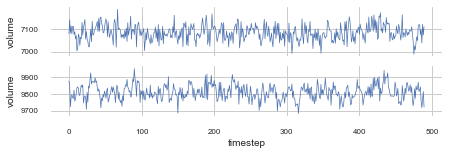

In [58]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,2), sharex=True)
df_ts1 = pd.DataFrame(example_ts1).melt()
df_ts1['variable'] = df_ts1.index
sns.set_style("whitegrid")
ax1 = sns.lineplot(x="variable", y="value", data=df_ts1, ax=ax1)

x_axis = ax1.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
ax1.set_ylabel('volume')

df_ts2 = pd.DataFrame(example_ts2).melt()
df_ts2['variable'] = df_ts2.index
ax2 = sns.lineplot(x="variable", y="value", data=df_ts2, ax=ax2)
ax2.set_ylabel('volume')
ax2.set_xlabel('timestep')
sns.despine(left=True, bottom=True)

plt.savefig('figs/fmri.pdf',  bbox_inches='tight', pad_inches=0.1)

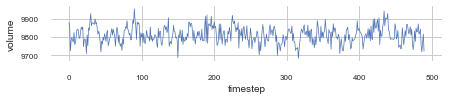

In [59]:
fig, ax = plt.subplots(figsize=(7,1))
df_ts1 = pd.DataFrame(example_ts2).melt()
df_ts1['variable'] = df_ts1.index
sns.set_style("whitegrid")
ax = sns.lineplot(x="variable", y="value", data=df_ts1, ax=ax)
ax.set_ylabel('volume')
ax.set_xlabel('timestep')
sns.despine(left=True, bottom=True)

plt.savefig('figs/fmri.pdf',  bbox_inches='tight', pad_inches=0.1)

# Noise effects

In [156]:
df_noise = pd.read_csv('noise.csv')

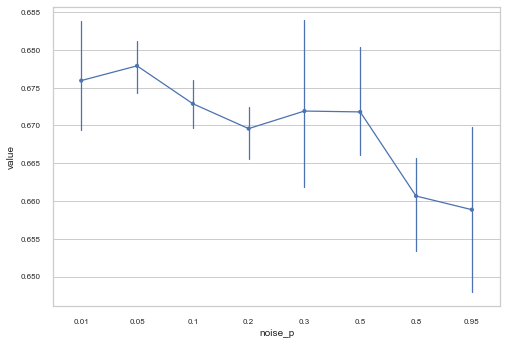

In [163]:
# fig, ax = plt.subplots(figsize=set_size())
# df_ts1 = pd.DataFrame(example_ts2).melt()
# df_ts1['variable'] = df_ts1.index
sns.set_style("whitegrid")
# ax = sns.lineplot(x="variable", y="value", data=df_ts1, ax=ax)
# ax.set_ylabel('volume')
# ax.set_xlabel('timestep')
sns.despine(left=True, bottom=True)

sns.pointplot(x="noise_p", y="value", data=df_noise[(df_noise['conv_type'] == 'gcn') & (df_noise['noise_type']=='node') & (df_noise['metric_type'] == 'r')])

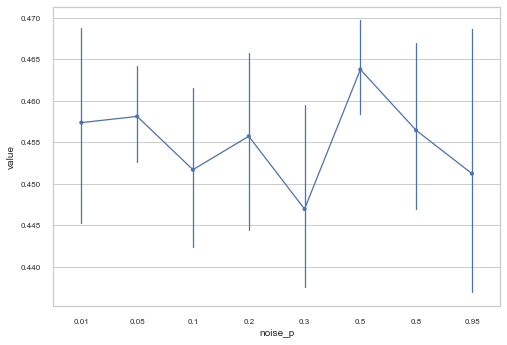

In [149]:
sns.pointplot(x="noise_p", y="value", data=df_noise[(df_noise['conv_type'] == 'gcn') & (df_noise['noise_type']=='edge') & (df_noise['metric_type'] == 'r2')])

In [93]:
np.std(df_noise[(df_noise['conv_type'] == 'gcn') & (df_noise['noise_type']=='node') & (df_noise['metric_type'] == 'r2')])

noise_p    0.167498
value      0.014131
dtype: float64

In [140]:
df_noise[(df_noise['conv_type'] == 'gcn') & (df_noise['noise_type']=='node') & (df_noise['metric_type'] == 'r2')].groupby(['noise_p']).std()

,value
noise_p,
0.01,0.020440
0.05,0.006642
0.10,0.012026
0.20,0.010974
0.30,0.017913
0.50,0.017198
0.80,0.011214
0.95,0.019835


In [141]:
df_noise[(df_noise['conv_type'] == 'gcn') & (df_noise['noise_type']=='node') & (df_noise['metric_type'] == 'r2')].groupby(['noise_p']).mean()

,value
noise_p,
0.01,0.441658
0.05,0.453037
0.10,0.446352
0.20,0.439450
0.30,0.446759
0.50,0.441532
0.80,0.428251
0.95,0.422900


In [164]:
gat_edge_noise = {"random_state_0.p=0.1": [
        0.677027257590352,
        0.4488095315699636
    ],
    "random_state_0.p=0.2": [
        0.697848706364175,
        0.4786267660435016
    ],
    "random_state_0.p=0.3": [
        0.7018468458924091,
        0.484895964648821
    ],
    "random_state_0.p=0.5": [
        0.6943218937286548,
        0.4724824639371992
    ],
    "random_state_0.p=0.8": [
        0.685115954160385,
        0.46802984046877927
    ],
    "random_state_0.p=0.01": [
        0.6688706927964457,
        0.43580508150487784
    ],
    "random_state_0.p=0.05": [
        0.6578490431790825,
        0.4123131841642076
    ],
    "random_state_0.p=0.95": [
        0.6918166485472176,
        0.466327992581238
    ],
    "random_state_1.p=0.1": [
        0.6987419985259633,
        0.4783931389825232
    ],
    "random_state_1.p=0.2": [
        0.6932337837243293,
        0.47103851484702575
    ],
    "random_state_1.p=0.3": [
        0.6756942253893955,
        0.4374878496260255
    ],
    "random_state_1.p=0.5": [
        0.6919782516467441,
        0.46206501699776314
    ],
    "random_state_1.p=0.8": [
        0.6943526752879968,
        0.4710892972261117
    ],
    "random_state_1.p=0.01": [
        0.6869287356305749,
        0.4591449893664753
    ],
    "random_state_1.p=0.05": [
        0.7127130958332477,
        0.5052152070164235
    ],
    "random_state_1.p=0.95": [
        0.6958010861770644,
        0.4789359530015036
    ],}

In [165]:
for v in gat_edge_noise.keys():
    p = float(re.search('random_state_.\.p=(.*)', v).group(1))
    df_noise.loc[i+df_noise.shape[0]] = ['gat', p, 'edge', 'r', gat_edge_noise[v][0]]
    df_noise.loc[i+df_noise.shape[0]] = ['gat', p, 'edge', 'r2', gat_edge_noise[v][1]]

In [166]:
df_noise[(df_noise['conv_type'] == 'gat') & (df_noise['noise_type']=='edge')]

,conv_type,noise_p,noise_type,metric_type,value
224,gat,0.10,edge,r,0.677027
225,gat,0.10,edge,r2,0.448810
226,gat,0.20,edge,r,0.697849
227,gat,0.20,edge,r2,0.478627
228,gat,0.30,edge,r,0.701847
229,gat,0.30,edge,r2,0.484896
230,gat,0.50,edge,r,0.694322
231,gat,0.50,edge,r2,0.472482
232,gat,0.80,edge,r,0.685116
233,gat,0.80,edge,r2,0.468030


In [ ]:
df_noise.to_csv('noise1.csv')